In [1]:
import grid2op
import numpy as np
from lightsim2grid import LightSimBackend
from grid2op.Parameters import Parameters
param = Parameters()
param.ENV_DC = True
param.MAX_LINE_STATUS_CHANGED = 99999
param.MAX_SUB_CHANGED = 99999
env = grid2op.make("l2rpn_case14_sandbox", param=param)

/Users/antoinemarot/dev/grid2op_alert_feature/venv_grid2op/lib/python3.8/site-packages/grid2op/Backend/PandaPowerBackend.py:30: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	/Users/antoinemarot/dev/grid2op_alert_feature/venv_grid2op/bin/python -m pip install numba

  warnings.warn("Numba cannot be loaded. You will gain possibly massive speed if installing it by "
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



# compute the A matrix that defines the delta

$$\delta_{i,j} = \frac{F_j^{i} - F_j}{F_i}$$

with:
- $\delta_{i,j}$ : "le coefficient de report"
- $F_k$: the active flow on line `k`
- $F_j^{i}$: the flow on line j if the line i is disconnected

We are interested, given all the $\delta_{i,j}$ to compute the $\delta_{\{i,j,k, ...\}, m}$ which are the flows on line `m` when the lines $\{i,j,k, ...\}$ are disconnected

In [2]:
_ = env.reset()
with env.copy() as tmp_env:
    init_obs, *_ = tmp_env.step(env.action_space())
F = 1. * init_obs.p_or

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [3]:
all_flows = np.zeros((env.n_line, env.n_line))
for l_id in range(env.n_line):
    with env.copy() as tmp_env:
        obs, *_ = tmp_env.step(env.action_space({"set_line_status": [(l_id, -1)]}))
        all_flows[l_id, :] = obs.p_or

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install nu

In [11]:
A = (all_flows - F) / F.reshape(-1, 1)

In [12]:
F

array([ 3.8385807e+01,  3.7514194e+01,  2.2205816e+01,  4.1622028e+01,
        3.5057961e+01,  1.7205816e+01, -2.9515989e+01,  6.3926916e+00,
        7.0583978e+00,  1.6405075e+01,  5.8073087e+00,  9.5365267e+00,
       -2.9926918e+00,  1.6583974e+00,  5.1634731e+00,  2.7433434e+01,
        1.6010401e+01,  3.6256165e+01, -1.1102230e-14, -2.7433434e+01],
      dtype=float32)

In [13]:
A[3][3]

-1.0

In [14]:
init_obs.p_or[2] + A[1, 2] * init_obs.p_or[1]

28.539945602416992

In [15]:
all_flows[1, 2]

28.539945602416992

In [16]:
all_flows[1]

array([ 7.59000015e+01,  0.00000000e+00,  2.85399456e+01,  5.48780060e+01,
        5.29820480e+01,  2.35399456e+01, -1.10085878e+01,  5.74071264e+00,
        6.96263933e+00,  1.60701084e+01,  6.45928764e+00,  9.96725178e+00,
       -2.34071279e+00,  1.56263912e+00,  4.73274851e+00,  2.81171284e+01,
        1.64094105e+01,  3.51734619e+01, -2.22044605e-14, -2.81171284e+01])

In [17]:
env.name_line

array(['0_1_0', '0_4_1', '1_2_2', '1_3_3', '1_4_4', '2_3_5', '3_4_6',
       '5_10_7', '5_11_8', '5_12_9', '8_9_10', '8_13_11', '9_10_12',
       '11_12_13', '12_13_14', '3_6_15', '3_8_16', '4_5_17', '6_7_18',
       '6_8_19'], dtype='<U8')

<ipython-input-49-8be531440444>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


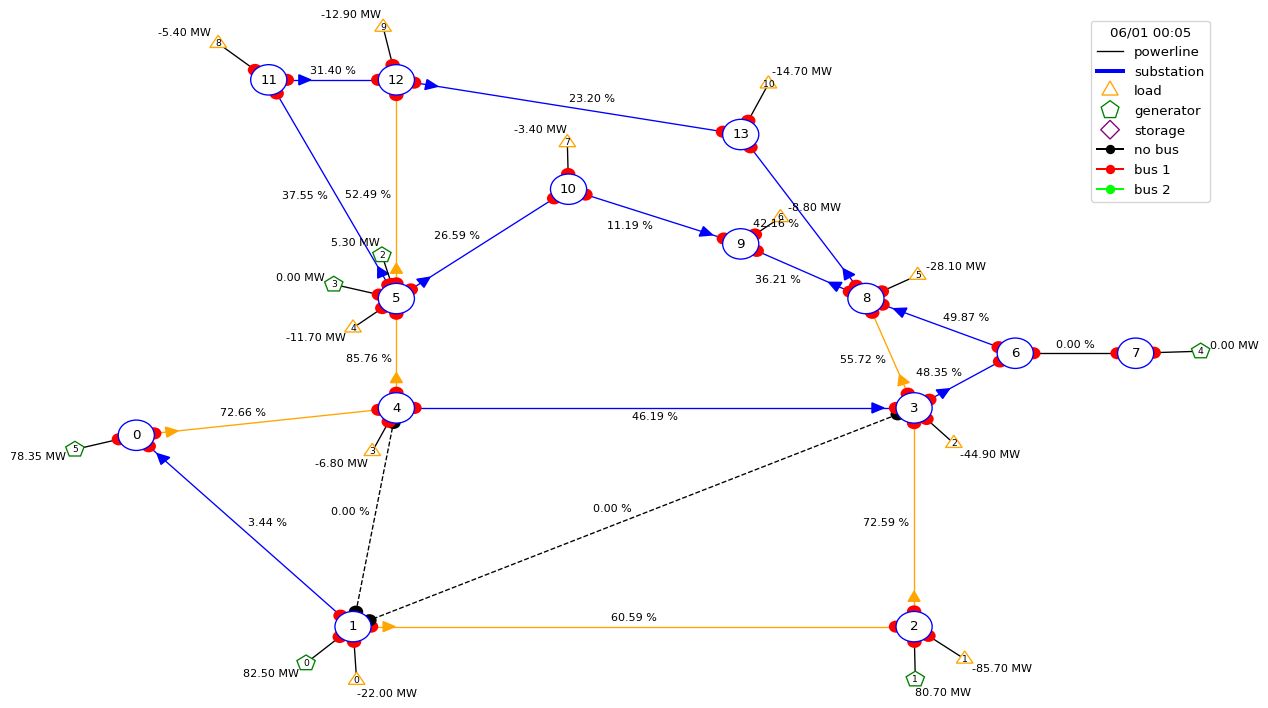

In [49]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs)
fig.show()


In [18]:
id_l1=3
id_l2=7
with env.copy() as tmp_env:
    obs, *_ = tmp_env.step(env.action_space({"set_line_status": [(id_l1, -1),(id_l2, -1)]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-17-395f7dd74f78>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


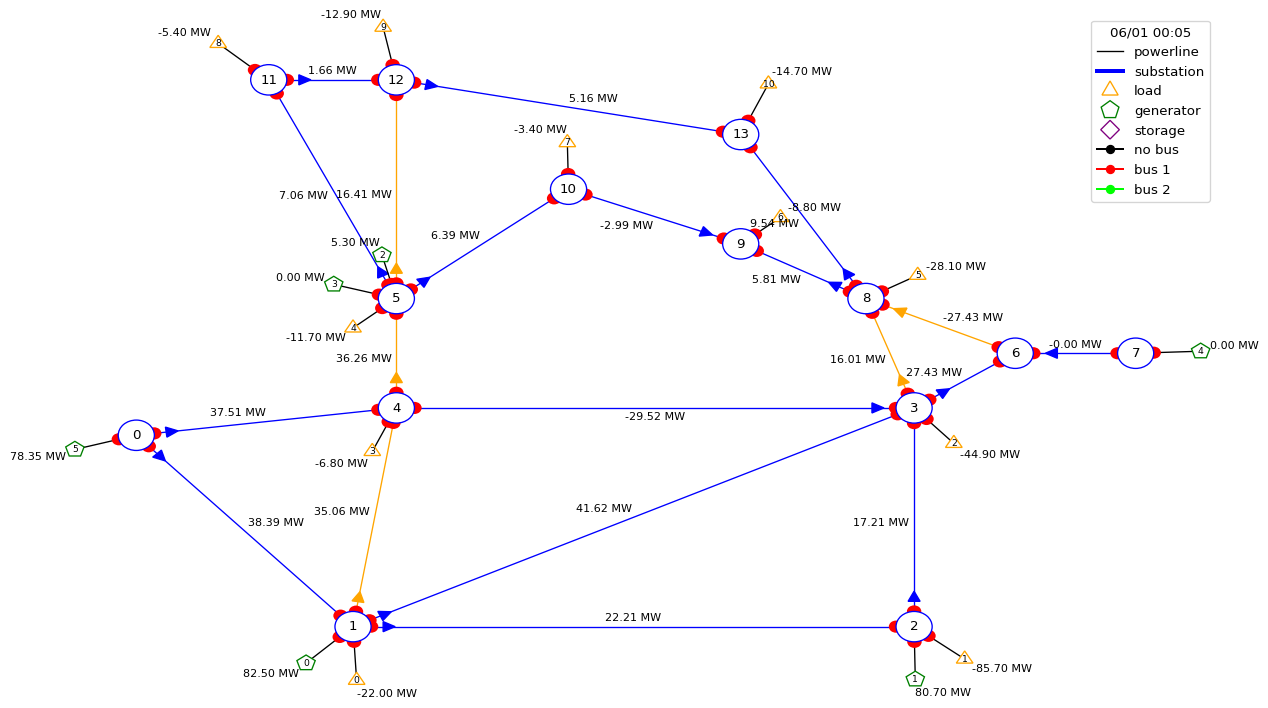

In [17]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(init_obs,line_info='p')
fig.show()

<ipython-input-16-d0b6ac89ec88>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


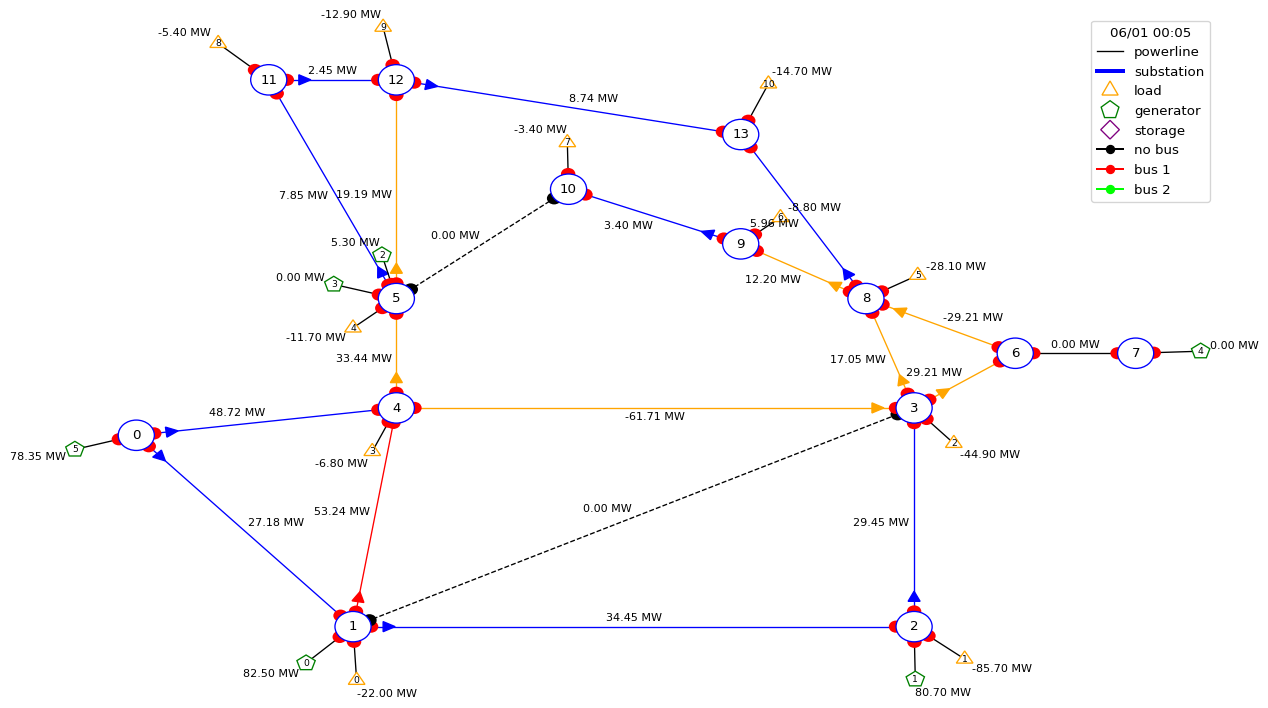

In [16]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs,line_info='p')
fig.show()

# Compute N-K flows with N-1 flow distribution ratios

In [45]:
#Equations for N-2
#Fl1_prime*A[id_l1][id_l1]+Fl2_prime*A[id_l2][id_l1]=-Fl1
#Fl1_prime*A[id_l1][id_l2]+Fl2_prime*A[id_l2][id_l2]=-Fl2

In [9]:
import numpy as np

In [24]:
import numpy as np
def get_Virtual_Flows_N2(por_init,A,idl1,idl2):
    a=np.array([[A[idl1][idl1],A[idl2][idl1]],[A[idl1][idl2],A[idl2][idl2]]])
    b=np.array([-por_init[idl1],-por_init[idl2]])
    [pl1_virtual,pl2_virtual]=np.linalg.solve(a,b)
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A[idl2]*pl2_virtual
    
    return por_virtual

In [43]:
#a generic version for n-K
def get_Virtual_Flows_NK(por_init,A,ilds):
    a=[]
    for idl in ilds:
        a_row=np.array([A[idlj][idl] for idlj in ilds])
        a.append(a_row)

    b=np.array([-por_init[idl] for idl in ilds])
    pls_virtual=np.linalg.solve(a,b)
    print(pls_virtual)
    
    por_virtual=por_init
    for i in range(len(ilds)):
        por_virtual+=A[ilds[i]]*pls_virtual[i]
    
    return por_virtual

In [41]:
#a reccursive approximation without solving equations
def get_Virtual_Flows_reccursion_approx_N2(por_init,A,idl1,idl2,iter=10):
    p1_init=por_init[idl1]+por_init[idl2]*A[idl2][idl1]
    pl1_virtual=p1_init
    
    coeff_iter=0
    for i in range(iter):
        #pl1_virtual+=p1_init*(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
        coeff_iter+=(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
    
    pl1_virtual+=p1_init*coeff_iter
    
    p2_init=por_init[idl2]+por_init[idl1]*A[idl1][idl2]
    pl2_virtual=p2_init
    
    #for i in range(iter):
    #    pl2_virtual+=p2_init*(A[idl1][idl2]**(i+1))*(A[idl2][idl1]**(i+1))
    
    pl2_virtual+=p2_init*coeff_iter
    
    print(pl1_virtual)
    print(pl2_virtual)
    
    por_virtual=por_init+A[idl1]*pl1_virtual+A[idl2]*pl2_virtual
    
    return por_virtual
    

In [36]:
idl1=3
idl2=4
por_virtual_N2=get_Virtual_Flows_N2(init_obs.p_or,A,idl1,idl2)

70.22993691477166
66.11122665749366


In [37]:
por_virtua_N2_approx=get_Virtual_Flows_reccursion_approx_N2(init_obs.p_or,A,idl1,idl2)

70.22993603112796
66.1112258256722


In [44]:
get_Virtual_Flows_NK(init_obs.p_or,A,[idl1,idl2])

[70.22993691 66.11122666]


array([-4.5808091e+00,  8.0480812e+01,  5.5919193e+01,  3.1504021e-07,
        2.2853774e-06,  5.0919193e+01, -3.6987556e+01,  6.6559010e+00,
        7.0970554e+00,  1.6540304e+01,  5.5440993e+00,  9.3626385e+00,
       -3.2559001e+00,  1.6970559e+00,  5.3373609e+00,  2.7157425e+01,
        1.5849320e+01,  3.6693260e+01,  7.6308529e-15, -2.7157425e+01],
      dtype=float32)

## comparing to real N-2 load flow

In [47]:
with env.copy() as tmp_env:
    obs, *_ = tmp_env.step(env.action_space({"set_line_status": [(idl1, -1),(idl2, -1)]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-50-d0b6ac89ec88>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


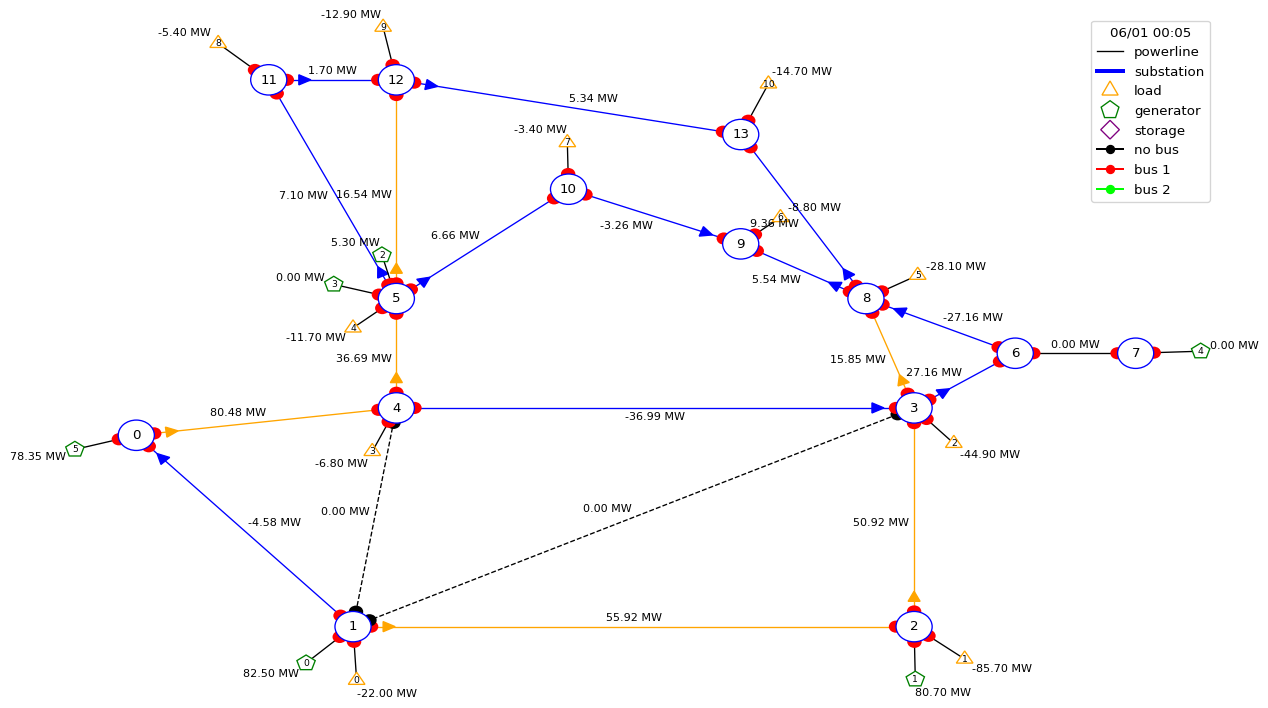

In [50]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs,line_info='p')
fig.show()

In [51]:
np.max(np.abs(por_virtual_N2-obs.p_or))

4.285054274077993e-06

## comparing to real N-K load flow

In [54]:
idls=[3,4,7,14]
with env.copy() as tmp_env:
    obs_NK, *_ = tmp_env.step(env.action_space({"set_line_status": [(idl, -1) for idl in idls]}))

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



<ipython-input-55-7aa62d7e4dc0>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


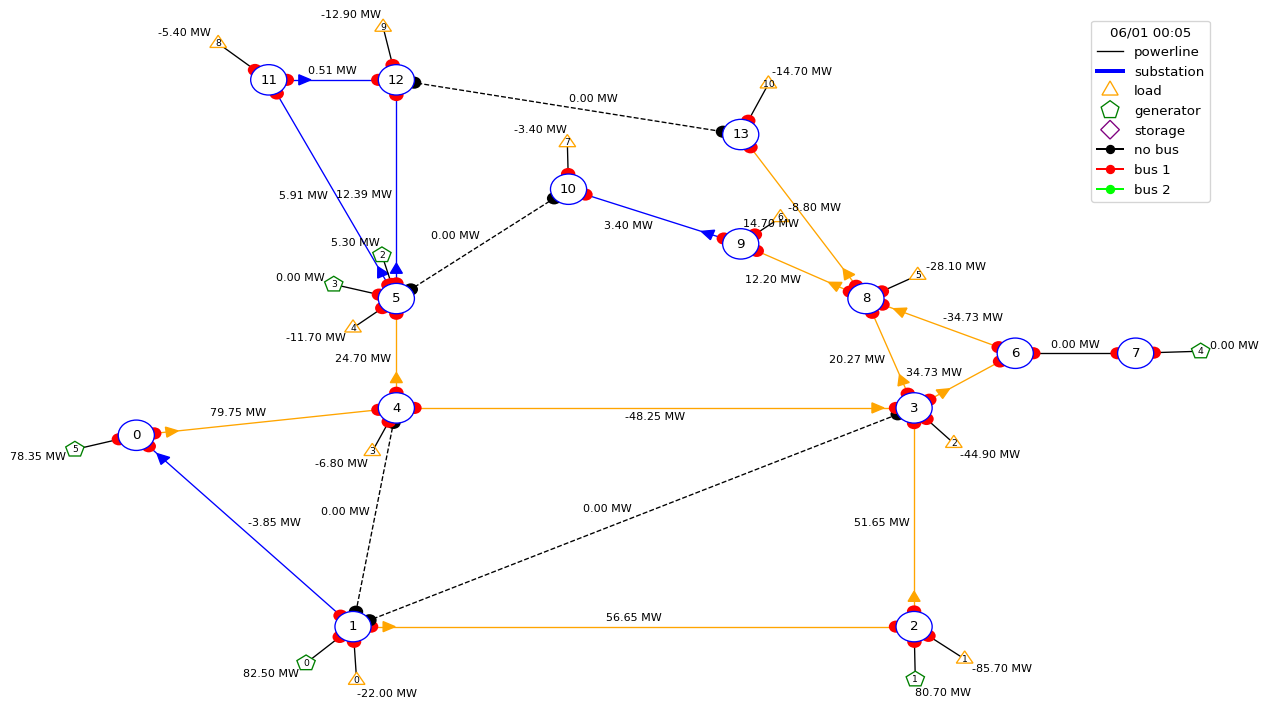

In [55]:
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs_NK,line_info='p')
fig.show()

In [56]:
por_virtual_NK=get_Virtual_Flows_NK(init_obs.p_or,A,idls)

[ 0.95441009 -0.74585112 11.63774836  9.95456625]


In [57]:
np.max(np.abs(por_virtual_NK-obs_NK.p_or))

1.9073486e-05

## Do topological changes now

In [58]:
from sub_elems import get_valid_sub_action

In [59]:
import json
action_dict_file="unitary_actions_l2rpn_2019.json"
with open(action_dict_file) as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

In [60]:
jsonObject

{'sub_4': {'a': {'lines_id_bus': [[4, 2]], 'loads_id_bus': [[3, 2]]},
  'b': {'lines_id_bus': [[4, 2], [6, 2]]},
  'c': {'lines_id_bus': [[1, 2], [17, 2]]},
  'd': {}},
 'sub_3': {'a': {'lines_id_bus': [[6, 2], [16, 2]]},
  'b': {'lines_id_bus': [[6, 2], [15, 2]]},
  'c': {'lines_id_bus': [[16, 2], [5, 2]]},
  'd': {'lines_id_bus': [[16, 2], [5, 2], [6, 2]]},
  'e': {}},
 'sub_1': {'a': {'lines_id_bus': [[0, 2], [4, 2]], 'loads_id_bus': [[0, 2]]},
  'b': {'lines_id_bus': [[0, 2], [4, 2], [2, 2]]},
  'c': {'lines_id_bus': [[0, 2], [3, 2], [4, 2]]},
  'd': {}},
 'sub_8': {'a': {'lines_id_bus': [[19, 2], [10, 2], [11, 2]]},
  'b': {'lines_id_bus': [[16, 2], [11, 2]]},
  'c': {}},
 'sub_5': {'a': {'lines_id_bus': [[17, 2], [9, 2], [7, 2]]}, 'b': {}}}

In [68]:
sub_id=4
action_1_def={sub_id:{'lines_id_bus': [[4, 2], [6, 2]]}}
action1=get_valid_sub_action(env.action_space,action_1_def)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



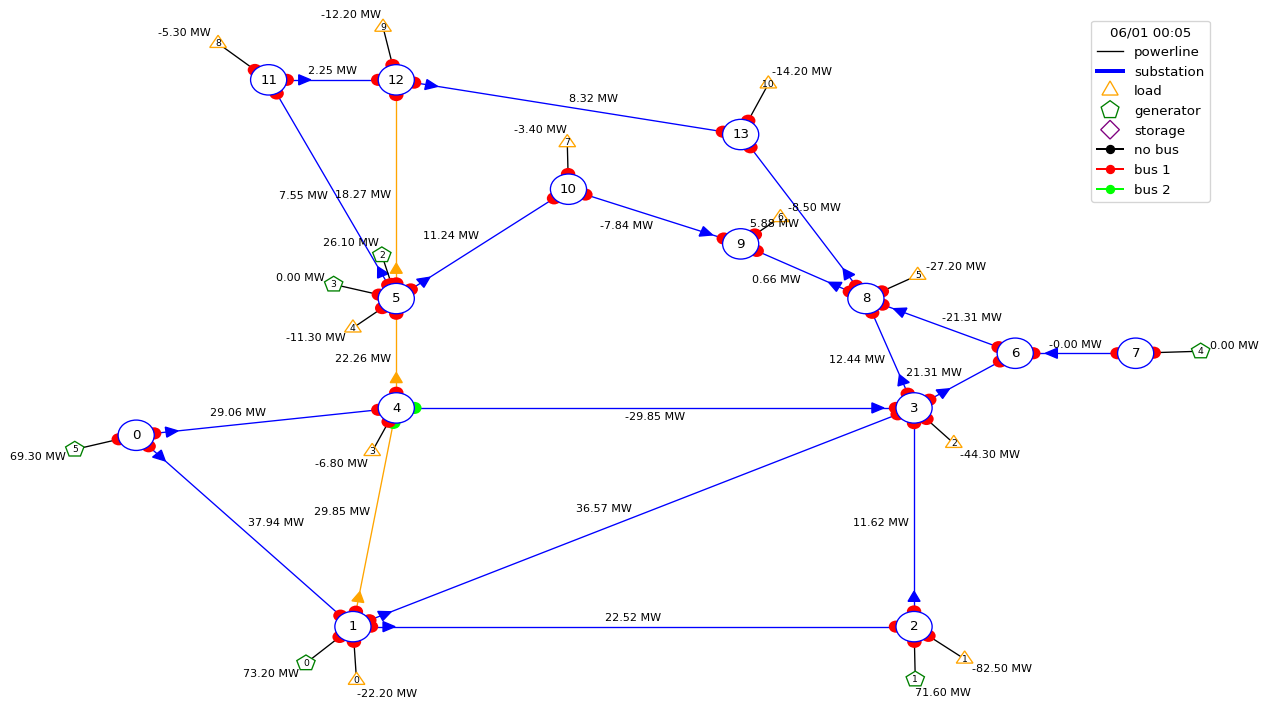

In [69]:
obs = env.reset()
obs, reward, done, info = obs.simulate(env.action_space(action1))
fig_obs = plot_helper.plot_obs(obs, line_info='p')

recall init obs


<ipython-input-70-bb2675fe5c49>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


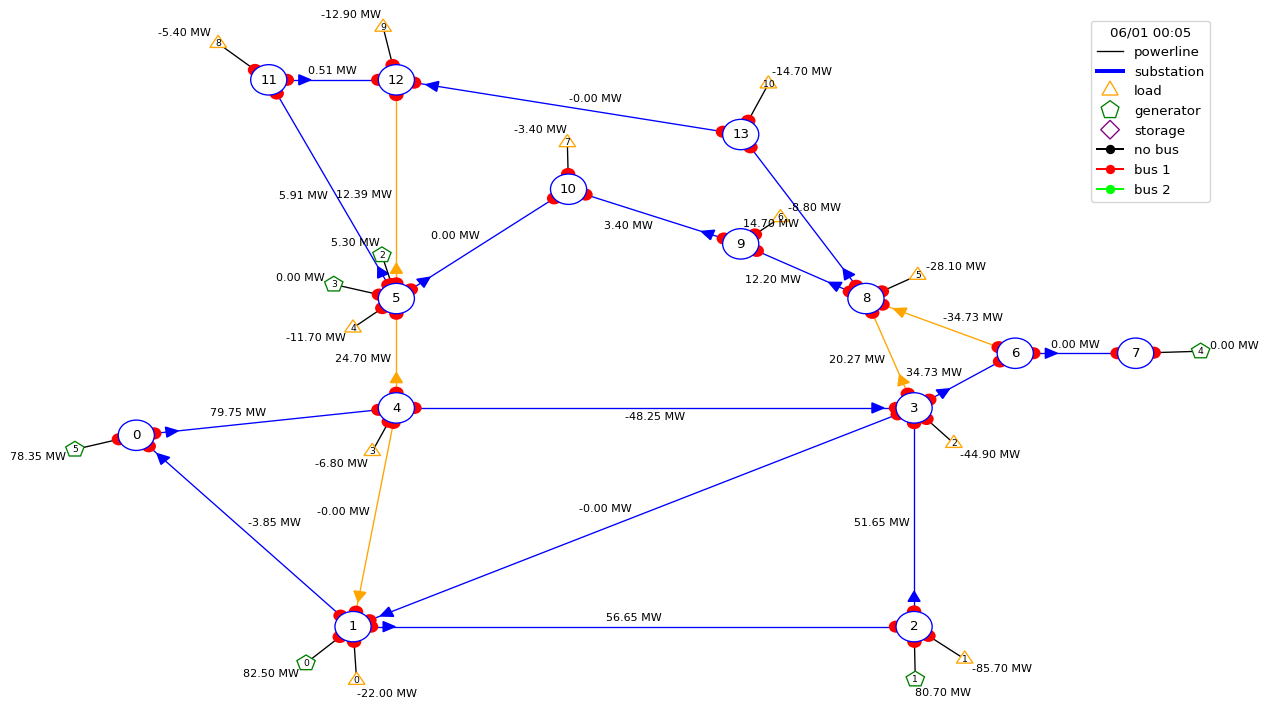

In [70]:
print("recall init obs")
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(init_obs,line_info='p')
fig.show()

In [74]:
obs.sub_topology(4)

array([1, 2, 2, 1, 1], dtype=int32)

In [86]:
lines_sub=[i for i in range(env.n_line) if env.line_or_to_subid[i]==sub_id or env.line_ex_to_subid[i]==sub_id]
gens_sub=[]
loads_sub=[]
try:
    gens_sub=env.get_generators_id(sub_id)
except:
    pass

try:
    loads_sub=env.get_loads_id(sub_id)
except:
    pass

In [ ]:
Injection_Node_1_init=0
Injection_Node_2_init=0

for l in lines_sub:
    if env.line_or_to_subid[i]==sub_id
        bus=obs.line_or_bus[i]
        if bus==1:
            Injection_Node_1+=init_obs.p_or[l]
        else:
            Injection_Node_2+=init_obs.p_or[l]
    else:
        bus=obs.line_ex_bus[i]
        if bus==1:
            Injection_Node_1+=init_obs.p_ex[l]
        else:
            Injection_Node_2+=init_obs.p_ex[l]

for gen in gens_sub:
    bus=obs.gen_bus(gen)
    if bus==1:
        Injection_Node_1+=init_obs.gen_p[gen]

In [89]:
obs.gen_bus

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [87]:
loads_sub

[3]

In [84]:
env.get_loads_id(4)


[3]

In [ ]:
virtual_action_line_flow_init=

# compute the "injection"

The "injections" are defined recursively with:

- $p_i^{(0)} = 0$  I disconnect line `i`
- $p_j^{(0)} = F_j + \delta_{i,j}.F_i$  equivalent injection on line `j` when `i` is disconnected

And then:

- $p_i^{(1)} = (F_j + \delta_{i,j}.F_i).\delta_{j,i}$
- $p_j^{(1)} = 0$

And then:

- $p_i^{(2)} = 0$
- $p_j^{(2)} = (F_j + \delta_{i,j}.F_i).\delta_{j,i}.\delta_{i,j}$

And then:

- $p_i^{(3)} = (F_j + \delta_{i,j}.F_i).\delta_{j,i}^2.\delta_{i,j}$
- $p_j^{(3)} = 0$

Etc.

And we are interested in their sum:

$S_i = (F_j + \delta_{i,j}.F_i).(\sum_{k} \delta_{j,i}^{k+1}.\delta_{i,j}^{k})$

and

$S_j = (F_j + \delta_{i,j}.F_i).(1+\sum_{k} \delta_{j,i}^{k}.\delta_{i,j}^{k})$

And we want to assess whether:

$F^{\{i,j\}}_{m} = F_m + \delta_{i,m}.S_i + \delta_{j, m}.S_j$

In [7]:
i = 3  # be carefull, you have to get: A[i,j]*A[j,i] != 1 !!
j = 4

assert A[i,j] * A[j,i] < 1, "the coefficient A[i,j]*A[j,i] should be smaller than 1, please change i or j"
# compute S_i
S_i = 0
tmp = A[j,i]
while tmp > 1e-8:
    S_i += tmp
    tmp *= A[i,j] * A[j,i]
S_i *= (F[j] + A[i,j]*F[i])

# compute S_j
S_j = 0
tmp = 1
while tmp > 1e-8:
    S_j += tmp
    tmp *= A[i,j] * A[j,i]
S_j *= (F[j] + A[i,j]*F[i])

In [13]:
m = 8
F_ij_m = F[m] + A[i,m] * S_i + A[j,m] * S_j
print(f"Prediction with the 'new' method: {F_ij_m:.3f} MW")

Prediction with the 'new' method: 6.952 MW


In [14]:
naive_pred = F[m] + A[i,m] * F[i] + A[j,m] * F[j]
print(f"Prediction with the 'naive' method (we say it's combinaison of both): {naive_pred:.3f} MW")

Prediction with the 'naive' method (we say it's combinaison of both): 7.094MW


In [15]:
# now we check the "real flow"
with env.copy() as tmp_env:
    final_obs, *_ = tmp_env.step(env.action_space({"set_line_status": [(i, -1), (j, -1)]}))
    assert final_obs.p_or[i] == 0
    assert final_obs.p_or[j] == 0
print(f"Real flow after the two disconnections: {final_obs.p_or[m]:.3f} MW")

Real flow after the two disconnections: 7.097 MW
